In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [10]:
from keras.models import model_from_json
json_file=open("Puffy.json","r")
model_puffy_json=json_file.read()
json_file.close()
puffy_model=model_from_json(model_puffy_json)
puffy_model.load_weights("PuffyWeights.h5")
print("Loaded puffy_model successfully")

Loaded puffy_model successfully


In [11]:
json_file=open("Wrinkle.json","r")
model_wrinkle_json=json_file.read()
json_file.close()
wrinkle_model=model_from_json(model_wrinkle_json)
wrinkle_model.load_weights("WrinkleWeights.h5")
print("Loaded wrinkle_model successfully")

Loaded wrinkle_model successfully


In [12]:
json_file=open("DarkSpots.json","r")
model_DarkSpots_json=json_file.read()
json_file.close()
DarkSpots_model=model_from_json(model_DarkSpots_json)
DarkSpots_model.load_weights("DarkSpotsWeights.h5")
print("Loaded DarkSpots_model successfully")

Loaded DarkSpots_model successfully


In [13]:
def getPuffyClass(classNo):
    if classNo == 0: return "No Puffy Eyes"
    elif classNo == 1: return "Puffy Eyes"

In [14]:
def getWrinkleClass(classNo):
    if classNo == 0: return "No Wrinkles"
    elif classNo == 1: return "Wrinkled"

In [15]:
def getDarkSpotsClass(classNo):
    if classNo == 0: return "No Dark Spots"
    elif classNo == 1: return "Dark Spots"

In [17]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [77]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
image_path="/content/Bill.jpg"

In [79]:
images=[]
test=[]
for i in range(3):
    images.append(cv2.imread(image_path))

In [80]:
images=np.array(images)

In [81]:
len(images)

3

In [82]:
images.shape


(3, 225, 225, 3)

In [72]:
for i in range(3):
    test.append(cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY))    

In [73]:
test=np.array(test)

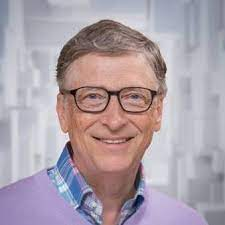

In [83]:
from google.colab.patches import cv2_imshow
img = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


In [86]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


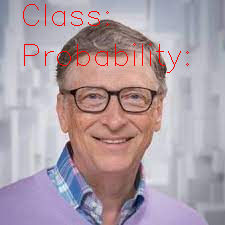

In [89]:
# Testing for wrinkles
for (x,y,w,h) in faces:
    img=images[0][x:x+w,y:y+h]
    imagearr=cv2.resize(img,(100,100))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape((1,100,100,1)) 
    predictions=wrinkle_model.predict(imagearr)
    classIndex=wrinkle_model.predict_classes(imagearr)
    probValue=np.amax(predictions)
    cv2.putText(images[0],"Class: ",(20,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255)) 
    cv2.putText(images[0],"Probability: ",(20,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255))
    if probValue>0.75:
        cv2.rectangle(images[0],(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(images[0],getWrinkleClass(classIndex),(120,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)
        cv2.putText(images[0],str(int(probValue*100))+" %",(200,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2_imshow(images[0])
    key=cv2.waitKey(0)
    if key==ord("\r"):
        cv2.destroyAllWindows()

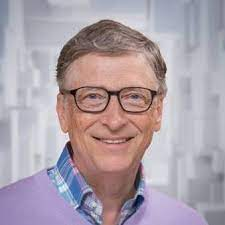

In [91]:
# Testing for puffy eyes
for (x,y,w,h) in faces:
    roi_gray = images[1][y:y+h, x:x+w]
    roi_color = images[1][y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        eye=roi_color[ex:ex+ew,ey:ey+eh]
        imagearr=eye
        imagearr=cv2.resize(imagearr,(100,100))
        imagearr=preprocessing(imagearr)
        imagearr=imagearr.reshape((1,100,100,1)) 
        predictions=puffy_model.predict(imagearr)
        classIndex=puffy_model.predict_classes(imagearr)
        probValue=np.amax(predictions)
        cv2.putText(images[1],"Class: ",(20,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255)) 
        cv2.putText(images[1],"Probability: ",(20,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255))
        if probValue>0.75:
            cv2.putText(images[1],getPuffyClass(classIndex),(120,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)
            cv2.putText(images[1],str(int(probValue*100))+" %",(200,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            for (ex,ey,ew,eh) in eyes:
                imgarr=roi_color[ex:ex+ew,ey:ey+eh]
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)  
            break    
    cv2_imshow(images[1])
    key = cv2.waitKey(0)
    if key==ord("\r"):
        cv2.destroyAllWindows()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


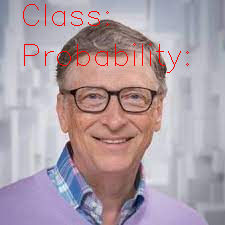

In [93]:
# Testing for Dark Spots
for (x,y,w,h) in faces:
    img=images[2][x:x+w,y:y+h]
    imagearr=cv2.resize(img,(100,100))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape((1,100,100,1)) 
    predictions=DarkSpots_model.predict(imagearr)
    classIndex=DarkSpots_model.predict_classes(imagearr)
    probValue=np.amax(predictions)
    cv2.putText(images[2],"Class: ",(20,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255)) 
    cv2.putText(images[2],"Probability: ",(20,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255))
    if probValue>0.75:
        cv2.rectangle(images[2],(x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(images[2],getDarkSpotsClass(classIndex),(120,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)
        cv2.putText(images[2],str(int(probValue*100))+" %",(200,65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2_imshow(images[2])
    key=cv2.waitKey(0)
    if key==ord("\r"):
        cv2.destroyAllWindows()

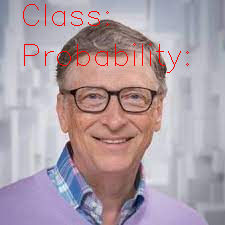

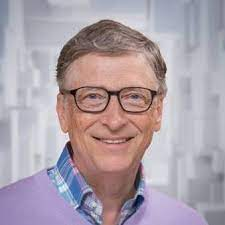

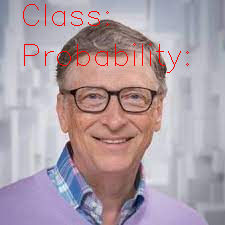

In [95]:
for i in range(3):
    cv2_imshow(images[i])
    cv2.waitKey(5000)
    cv2.destroyAllWindows()